# Diagnosing Lipohypertrophy 

### MDS Capstone Project with the Gerontology Diabetes Research Lab (GDRL)

#### Proposal Report Prepared by: Ela Bandari, Peter Yang, Lara Habashy and Javairia Raza

#### Mentor: Tomas Beuzen

#### Capstone Partner: Dr. Ken Madden 

<br>

#### 3.1. Executive Summary

Ultrasound imaging has shown promise in detecting subclinical lipohypertrophy, however, the criteria used to classify lipohypertrophy using ultrasound imaging is only implemented by a small group of physicians. In an effort to improve the accessibility of this method of detection, our capstone partner has asked us to explore the possibility of using supervised machine learning to detect lipohypertrophy on ultrasound images. 

In this project, we will be creating a convolutional neural network (CNN) to detect the presence of lipohypertrophy in ultrasound images. We will be testing a variety of image preprocessing and transfer learning methodologies to select our finalized machine learning pipeline. Our proposed data product is a python application that can intake new ultrasound images and make accurate predictions on the presence or absence of lipohypertrophy. 

<br>

#### 3.2. Introduction

Lipohypertrophy is a common complication for diabetic patients who inject insulin (Kapeluto et al., 2018). It is defined as the growth of fat cells and fibrous tissue with lowered vascularity in the skin following repeated trauma of insulin injection in the same area. Our focus is on subclinical hypertrophy which forms in the subcutaneous layer (the deepest layer of the skin) (Lumen, 2021). It is critical that insulin is not injected into areas of lipohypertrophy as it reduces the effectiveness of the insulin such that patients are unable to manage their blood sugar levels and may require more insulin to achieve the same therapeutic benefits (Kapeluto et al., 2018). Fortunately, research by Kapeluto et al. (2018) has found ultrasound imaging techniques are more accurate in finding these masses than a physical examination of the body by a healthcare professional. But, currently, the criteria to classify lipohypertrophy using ultrasound imaging is only implemented by a small group of physicians (Madden, 2021). To expand the usability of this criteria to a larger set of healthcare professionals, the capstone partner is interested in seeing if we could leverage supervised machine learning techniques to accurately classify the presence of lipohypertrophy given an ultrasound image. 

Therefore, our objective as the data science team is to build a binary classification convolutional neural network (CNN) model that classifies an ultrasound image into two classes, lipohypertrophy present or lipohypertrophy is not present. A CNN model is a common technique used to classify image data into binary categories. Furthermore, we would like to utilize object detection techniques to classify, given a positive lipohypertrophy site, the exact area of its location on an ultrasound image.


There are three identified levels of technical abstraction for the final data product. The first level of abstraction and the minimum viable product for this capstone project is a well-documented and reproducible machine learning pipeline. The source code from this analysis acts as a proof-of-concept for using a supervised learning approach to address the problem of detecting subclinical lipohypertrophy. The second level of abstraction includes deploying the model to a cloud-based service and creating an interface where users will be able to interact with it to obtain predictions on unseen data. The final level of abstraction is creating a python application using tools such as pyinstaller. This would allow healthcare workers to easily interact with our final data product without any prior knowledge of programming. 

<br>

#### 3.3. Data Science Techniques

Using the mappings provided, the team labelled positive and negative images into their respective categories. Efforts were made to crop the images to discard their borders and other annotated information, keeping only the core ultrasound image. The processed data consists of 263 images, a scarce yet fairly balanced dataset. The counts and proportion of positive and negative observations are shown in the table below. 

|  | Positive | Negative |
| --- | --- | --- |
| Count | 135 | 128 |
| Proportion | 51% | 49% |

To prepare the data for modeling, we performed various data augmentation techniques such as randomly flipping and/or rotating the images. We plan on further investigating data augmentation techniques such as contrast and brightness adjustment, scaling, and shifting. 

Furthermore, we have created a Python script to split the data into train, validation, and test sets. This facilitates data reading into PyTorch and allows the team to have holdout samples to validate model results.

The pre-processed data is fed into a CNN architecture that utilizes the pre-trained model *densemodels* which was chosen based on its popularity in deep learning applications. Given our small dataset, we chose to use transfer learning to leverage a model that has already been trained on thousands of images. The *densemodels* CNN model will be used as our baseline.

The baseline model is trained on the pre-processed data, yielding a validation accuracy score of 82% after 20 epochs (i.e. 20 passes of the entire training dataset). We further explored the baseline model’s performance by examining the feature importances on several observations. Below is an example of a positive observation (i.e. lipohypertrophy present). The highlighted areas are areas that the model believes are significant for deriving the prediction. We can observe that the model is highlighting areas where lipohypertrophy is located.

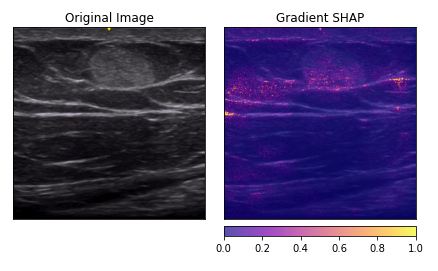

To evaluate the CNN model's performance, we will consider both accuracy and recall scores. Recall is an important metric from the healthcare providers’ perspective as administering insulin in a region that the model detected did not have lipohypertrophy when in fact there is lipohypertrophy present (i.e. false negatives) would be detrimental in managing diabetes. 

 Our review of the literature flagged other popular deep learning architectures that have been successful across a wide range of problems. As a second approach, we plan on utilizing the *VGG* architecture, proposed by Karen Simonyan and Andrew Zisserman in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". The *VGG* architecture has proven successful in applications with small images and combats the large memory requirement of the *densemodels* architecture. Our research also demonstrated that a *VGG* pre-trained  CNN model is slow to train as its learned weights are rather large. Therefore, we plan on exploring *Inception*, proposed in the paper "Going Deeper with Convolutions" (Szegedy et. al, 2014). We plan on modeling the performance of a variety of tuned CNN architectures against the baseline model to determine the most appropriate architecture. 


<br>

#### 3.4. Timeline

We have divided our project up into 3 phases.

- In Phase 1 (weeks 1 to 3), we aim to configure the most appropriate image pre-processing and CNN architectures by testing a variety of transfer learning techniques. 

- In Phase 2 (weeks 4 to 6), we aim to implement higher levels of sophistication to our data product to improve its accessibility to a non-technical audience. 

- In Phase 3 (weeks 6 to 8), we aim to complete our final data product, final report, and final presentation and add additional functionality such as object detection if time permits.    


<br>

#### References 

- Kapeluto, J.E., Paty, B.W., Chang, S.D. & Meneilly, G.S. (2018). Ultrasound detection of insulin-induced lipohypertrophy in Type 1 and Type 2 diabetes. Diabetic Medicine, 35(10), 1383-1390. https://doi.org/10.1111/dme.13764
- Lumen (2021, May 7). The Skin. Boundless Anatomy and Physiology. https://courses.lumenlearning.com/boundless-ap/chapter/the-skin/
- Madden, K. (2021, May 7). Machine Learning Approaches to: 1. Diagnosing Lipohypertrophy at the bedside, and 2. Falls Prediction in Long Term Care. https://github.ubc.ca/MDS-2020-21/DSCI_591_capstone-proj_students/blob/master/proposals/md/Machine_Learning_Approaches_to_Diagnosing_Lipohypertrophy_and_Predicting_Falls.md
- Simonyan, K. & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition [Conference session]. ICLR 2015:San Diego. https://arxiv.org/pdf/1409.1556.pdf 
- Szegedy, C., Liu, W., Jia, Y., Sermanet, P., Reed, S., Anguelov, D., Dumitru, E., Vanhoucke, V. & Rabinovich, A. (2015). Going deeper with convolutions. IEEE:Conference on Computer Vision and Pattern Recognition (CVPR), Boston. 10.1109/CVPR.2015.7298594